<a href="https://colab.research.google.com/github/trisharaj11/Climate_Impact_on_Crop_Productivity/blob/main/ReEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
crop_df = pd.read_csv("Crops_data.csv")
rain_df = pd.read_csv("district wise rainfall normal.csv")
temp_df = pd.read_csv("temperature.csv")


In [3]:
crop_df.columns
rain_df.columns
temp_df.columns


Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')

In [4]:
crop_df = crop_df[crop_df['Crop'].isin(['Rice','Wheat'])]


KeyError: 'Crop'

In [5]:
print(crop_df.head())
print(crop_df.columns)


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  2010          14  Chhattisgarh      Durg               777.92   
1          1  2011          14  Chhattisgarh      Durg               806.55   
2          1  2012          14  Chhattisgarh      Durg               807.07   
3          1  2013          14  Chhattisgarh      Durg               819.44   
4          1  2014          14  Chhattisgarh      Durg               834.87   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                      1319.18                 1695.77                 46.12   
1                      1416.48                 1756.23                 44.98   
2                      1534.22                 1900.97                 43.87   
3                      1296.24                 1581.86                 41.54   
4                      1444.24                 1729.89                 44.25   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [6]:
base_cols = [
    'Year',
    'State Name',
    'Dist Name',
    'RICE AREA (1000 ha)',
    'RICE YIELD (Kg per ha)',
    'WHEAT AREA (1000 ha)',
    'WHEAT YIELD (Kg per ha)'
]

crop_df = crop_df[base_cols]


In [8]:
rice_df = crop_df[['Year', 'State Name', 'Dist Name',
                    'RICE AREA (1000 ha)', 'RICE YIELD (Kg per ha)']]

rice_df.columns = ['Year', 'State', 'District', 'Area', 'Yield']
rice_df['Crop'] = 'Rice'


/tmp/ipython-input-1076335556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_df['Crop'] = 'Rice'


In [7]:
wheat_df = crop_df[['Year', 'State Name', 'Dist Name',
                     'WHEAT AREA (1000 ha)', 'WHEAT YIELD (Kg per ha)']]

wheat_df.columns = ['Year', 'State', 'District', 'Area', 'Yield']
wheat_df['Crop'] = 'Wheat'


/tmp/ipython-input-116372367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_df['Crop'] = 'Wheat'


In [9]:
crop_clean = pd.concat([rice_df, wheat_df], ignore_index=True)


In [10]:
crop_clean['District'] = crop_clean['District'].str.upper().str.strip()
crop_clean['State'] = crop_clean['State'].str.upper().str.strip()


In [11]:
crop_clean.head()
crop_clean.shape


(4968, 6)

In [12]:
rain_df = pd.read_csv("district wise rainfall normal.csv")
rain_df.head()


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [15]:
rain_df = rain_df[['STATE_UT_NAME', 'DISTRICT', 'ANNUAL']]
rain_df.rename(columns={
    'STATE_UT_NAME': 'State',
    'DISTRICT': 'District',
    'ANNUAL': 'Rainfall'
}, inplace=True)


/tmp/ipython-input-2746916111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df.rename(columns={


In [16]:
rain_df['District'] = rain_df['District'].str.upper().str.strip()
rain_df['State'] = rain_df['State'].str.upper().str.strip()


/tmp/ipython-input-1086429733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['District'] = rain_df['District'].str.upper().str.strip()
/tmp/ipython-input-1086429733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['State'] = rain_df['State'].str.upper().str.strip()


In [17]:
df = pd.merge(
    crop_clean,
    rain_df,
    on=['State','District'],
    how='inner'
)


In [18]:
temp_df = pd.read_csv("temperature.csv")

temp_df.rename(columns={
    'YEAR': 'Year',
    'ANNUAL': 'Temperature'
}, inplace=True)

temp_df = temp_df[['Year','Temperature']]


In [19]:
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)


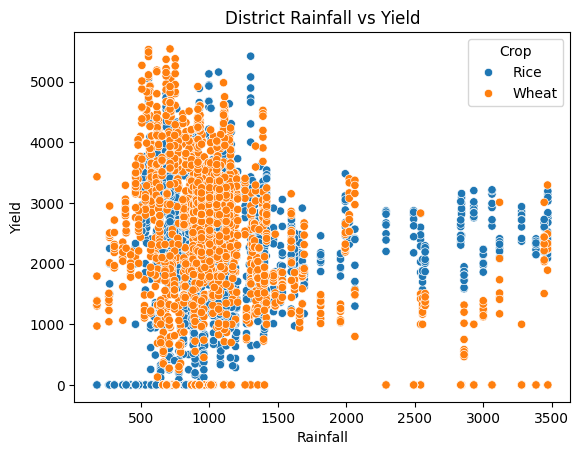

In [20]:
sns.scatterplot(data=df, x='Rainfall', y='Yield', hue='Crop')
plt.title("District Rainfall vs Yield")
plt.show()


In [23]:
temp_df = pd.read_csv("temperature.csv")
temp_df.head()


,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1961,24.00,18.98,26.11,27.06,21.17
1,1962,24.04,18.91,25.91,27.14,21.47
2,1963,24.15,19.07,25.57,27.21,22.04
3,1964,24.10,18.83,26.38,26.90,21.58
4,1965,24.07,19.22,25.24,27.08,22.10


In [25]:
temp_df.columns


Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')

In [26]:
temp_df.rename(columns={
    'YEAR': 'Year',
    'ANNUAL': 'Temperature'
}, inplace=True)

temp_df = temp_df[['Year', 'Temperature']]


In [27]:
temp_df = temp_df[temp_df['Year'].between(2010, 2017)]


In [28]:
df = pd.merge(df, temp_df, on='Year', how='inner')


In [29]:
df.columns


Index(['Year', 'State', 'District', 'Area', 'Yield', 'Crop', 'Rainfall',
       'Temperature'],
      dtype='object')

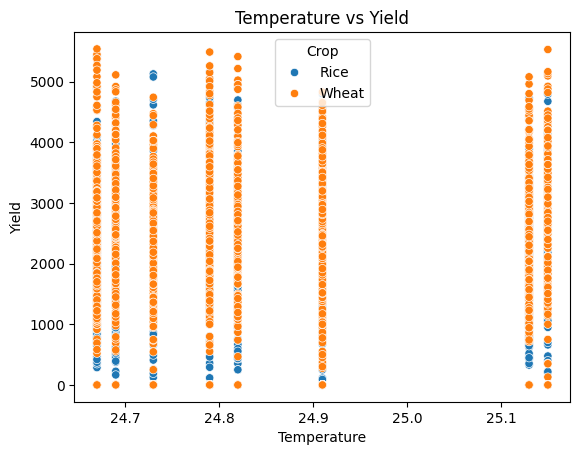

In [30]:
sns.scatterplot(data=df, x='Temperature', y='Yield', hue='Crop')
plt.title("Temperature vs Yield")
plt.show()


In [31]:
df['Log_Area'] = np.log1p(df['Area'])


In [32]:
X = df[['Rainfall', 'Temperature', 'Log_Area']]
y = df['Yield']


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X, y)


RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [38]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

In [39]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)


In [40]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("Linear Regression R²:", r2_score(y_test, lr_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))

print("Random Forest R²:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Linear Regression R²: 0.48029652338581086
Linear Regression RMSE: 887.5889027802414
Random Forest R²: 0.8069320653256552
Random Forest RMSE: 540.9898638429712


In [41]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("Train R²:", r2_score(y_train, train_pred))
print("Test R²:", r2_score(y_test, test_pred))


Train R²: 0.9588449151853369
Test R²: 0.8069320653256552
